# Лабораторна робота 2 (2 частина)

Романенко Ілля ФІТ 4-7

23 варіант

In [1]:
import pandas as pd

## Крок 1

завантажимо датасет "titanic (2).csv", він буде знаходитися в одній папці з блокнотом (був переназваний в titanic_2.csv)

In [2]:
filePath = './titanic_2.csv'

dataFrame = pd.read_csv(filePath)

dataFrame.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Крок 2

перевіримо датасет на пропущені данні

In [3]:
print('кількість колонок: ', dataFrame.shape[1])
print('кількість рядків: ', dataFrame.shape[0])

dataFrame.isnull().sum()

кількість колонок:  12
кількість рядків:  418


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Крок 3

перевіримо тип данних по стовпчиках

In [4]:
print('типи даних по колонках:\n',  dataFrame.dtypes)

типи даних по колонках:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Крок 4

видалимо стовпчик Cabin, так як він має занадто багато пропущених даних

In [5]:
dataFrame = dataFrame.drop(['Cabin'], axis=1)

dataFrame.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


для всіх інших пропущених значень в клітинках (в основному для стовпчика Age) заповнимо їх середнім медіанним значенням

In [6]:
dataFrame = dataFrame.fillna(dataFrame.mean(numeric_only=True), axis = 0)

dataFrame.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,S


перевіримо на порожні значення

In [7]:
dataFrame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Крок 5

перевіримо дані на дуплікати

In [8]:
dataFrame.duplicated().sum()

0

## Крок 6

виведемо описову статистику датасету

In [9]:
dataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Крок 7

сформуємо датасет з обраними стопцями ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

In [10]:
dataFrame = dataFrame.drop(['PassengerId', 'SibSp', 'Parch', 'Name', 'Ticket', 'Embarked'], axis=1)

dataFrame.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [11]:
print('типи даних по колонках:\n',  dataFrame.dtypes)

типи даних по колонках:
 Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object


## Крок 8

замінимо текстові дані про стать, числами

In [12]:
print(dataFrame['Sex'].unique())

['male' 'female']


In [13]:
dataFrame['Sex'] = dataFrame['Sex'].replace({'female': 1, 'male': 0}).astype(int)

dataFrame.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


## Крок 9

перевіримо відредаговані дані

In [14]:
dataFrame.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [15]:
print(dataFrame.head(5))
print(dataFrame.tail(5))

   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875
     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


In [16]:
print('типи даних по колонках:\n',  dataFrame.dtypes)

типи даних по колонках:
 Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object


## Крок 10

проаналізуємо заліжність виживання відносно статі пасажиру

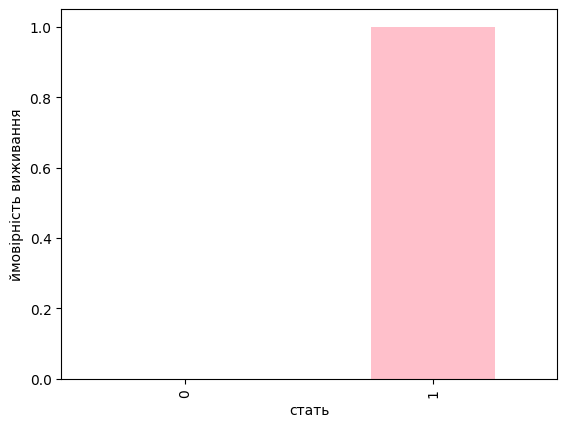

In [17]:
import matplotlib.pyplot as plt

survivalRate = dataFrame.groupby('Sex')['Survived'].mean()

survivalRate.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('стать')
plt.ylabel('ймовірність виживання')
plt.show()

отриманий результат свідчить що не існує жодного задукументованого чоловіка що врятувався на титаніку, водночас кожна записана жінка в датасеті вижила

## Крок 11

проаналізуємо залежність виживання пасажирів залежно від класу квитка

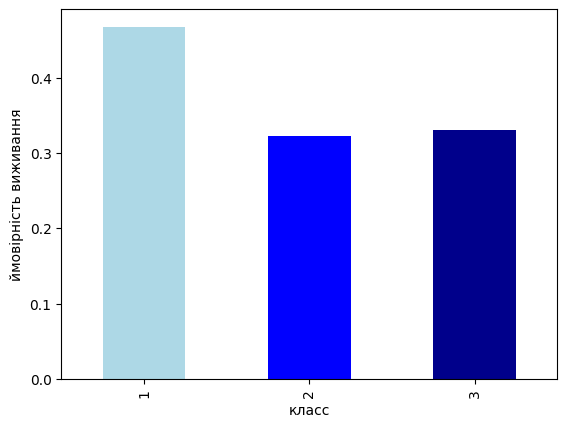

In [18]:
survivalRate = dataFrame.groupby('Pclass')['Survived'].mean()

survivalRate.plot(kind='bar', color=['lightblue', 'blue', 'darkblue'])

plt.xlabel('класс')
plt.ylabel('ймовірність виживання')
plt.show()


можемо бачити, що люди першого класу мали більший шанс вижити, ніж люди з першого чи другого

## Крок 12

проаналізуємо середній вік тих хто вижив та хто ні

In [19]:
ageOfSurvived = dataFrame[dataFrame['Survived'] == 1]['Age'].mean()
ageOfNotSurvived = dataFrame[dataFrame['Survived'] == 0]['Age'].mean()

print('середній вік тих, хто вижив: ', ageOfSurvived)
print('середній вік тих, хто не вижив: ', ageOfNotSurvived)

середній вік тих, хто вижив:  30.27239973050095
середній вік тих, хто не вижив:  30.272699293414263


отримані дані свідчать що вік, може не впливати на шанс виживання пасажиру, хоча це може бути через специфіку як саме збиралися данні

## Крок 13

проаналізуємо залежність вартості квитку, від шансу на виживання пасажиру

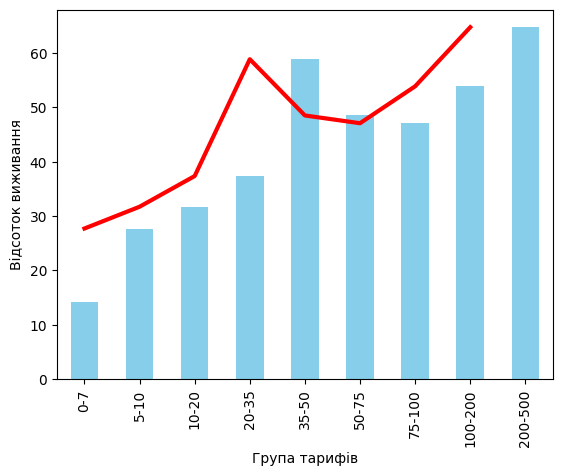

In [20]:
bins = [0, 7, 10, 20, 35, 50, 75, 100, 200, 500]
labels = ['0-7', '5-10', '10-20', '20-35', '35-50', '50-75', '75-100', '100-200', '200-500']
dataFrame['FareGroup'] = pd.cut(dataFrame['Fare'], bins=bins, labels=labels, right=False)

survivalRate = dataFrame.groupby('FareGroup')['Survived'].mean() * 100
dataFrame = dataFrame.drop(['FareGroup'], axis=1)

fig, ax = plt.subplots()

survivalRate.plot(kind='bar', color='skyblue', ax=ax)

ax.plot(survivalRate.index[1:],
        survivalRate.values[1:], 
        color='red',
        linestyle='-',
        linewidth=3)

ax.set_xlabel('Група тарифів')
ax.set_ylabel('Відсоток виживання')

plt.show()

можемо бачити майже прямолінійну залежність вартості білета від ймовірності виживання пасажиру

## Крок 14

проаналізуємо відповідсть класу до середньої ціни квитка на цей клас

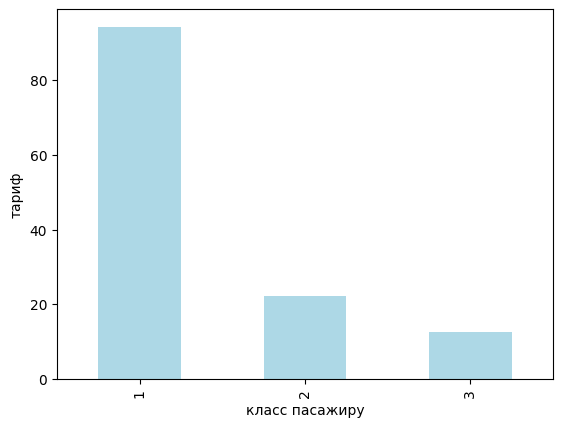

In [21]:
fareByClass = dataFrame.groupby('Pclass')['Fare'].mean()

fareByClass.plot(kind='bar', color='lightblue')
plt.xlabel('класс пасажиру')
plt.ylabel('тариф')
plt.show()

можемо бачити досить явну різницю в ціні квитка в залежності від класу

## Крок 15

проаналізуємо відносність середнього віку та класу пасажиру

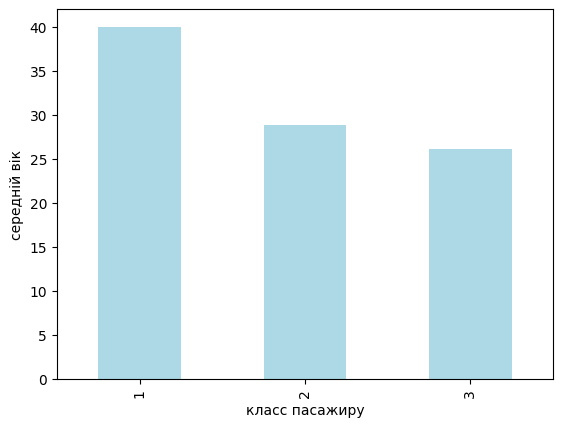

In [22]:
ageByClass = dataFrame.groupby('Pclass')['Age'].mean()

ageByClass.plot(kind='bar', color='lightblue')
plt.xlabel('класс пасажиру')
plt.ylabel('середній вік')
plt.show()

можемо бачити пряму залежність, що в вищих класах були більш старші пасажири

## Крок 16

побудуємо гістограму розподілу віку для тих хто вижив, і тих хто не вижив

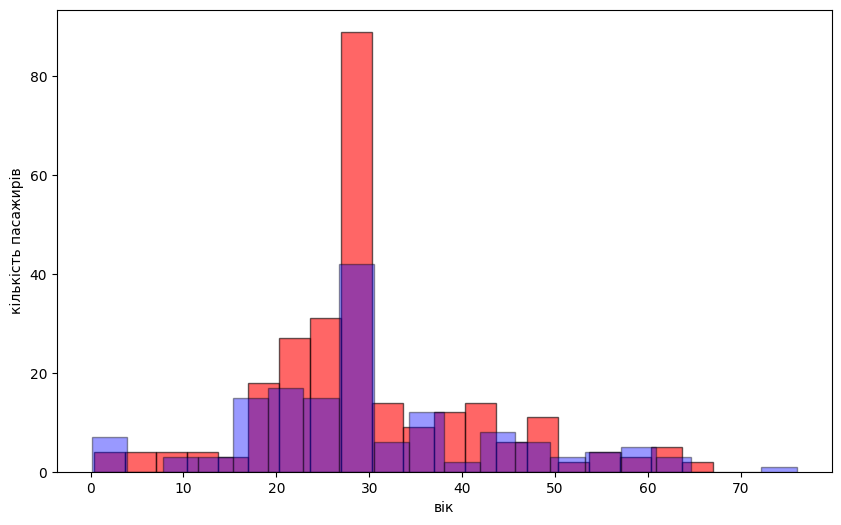

In [23]:
survivedAge = dataFrame[dataFrame['Survived'] == 1]['Age']
notSurvivedAge = dataFrame[dataFrame['Survived'] == 0]['Age']

plt.figure(figsize=(10, 6))
plt.hist(notSurvivedAge, bins=20, alpha=0.6, color='red', edgecolor='black')

plt.hist(survivedAge, bins=20, alpha=0.4, color='blue', edgecolor='black')

plt.xlabel('вік')
plt.ylabel('кількість пасажирів')
plt.show()

загалом на гістограмі можемо бачити як кількість пасажирів в різних вікових групах різниться, як і їх шанс вижити.

можемо бачити найбільший пік, та основний кластер пасажирів в віці від 20ти до 30ти років, адже в цьому кластері знаходилось найбільша кількість людей на борту титаніка

## Крок 17

проаналізуємо шанс на виживання за декількома параметрами (стать та клас пасажира)

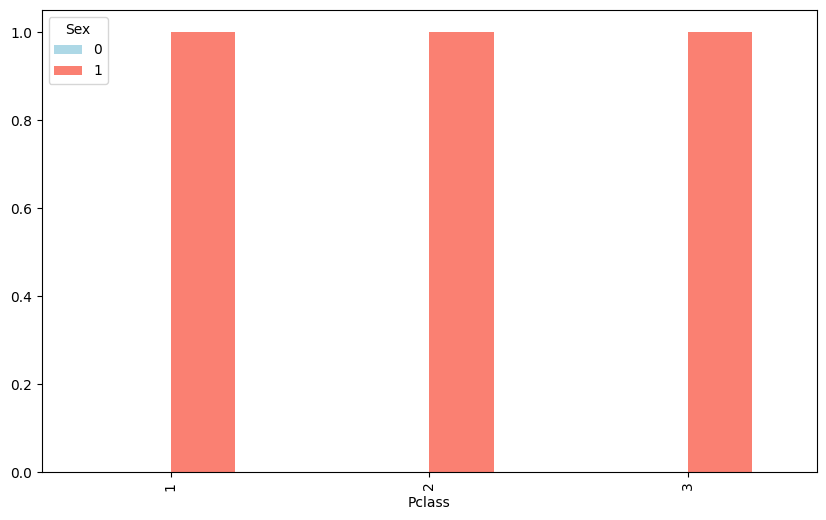

In [24]:
survivalRate = dataFrame.groupby(['Pclass', 'Sex'])['Survived'].mean()

survivalRate = survivalRate.unstack()

survivalRate.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])

plt.show()

за вхідних даних немає сенсу порівнювати за параметром статі, бо в любому випадку ми будемо бачити що всі жінки вижили, а всі чоловіки загинули, що зовсім не інформативно

## Крок 18



In [25]:
correlationMatrix = dataFrame[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']].corr()
# print('матриця кореляцій:\n', correlationMatrix)

correlationMatrixSurvival = correlationMatrix['Survived'].sort_values(ascending=False)
print('матриця кореліцій відносно шансу виживання:\n',correlationMatrixSurvival)

матриця кореліцій відносно шансу виживання:
 Survived    1.000000
Sex         1.000000
Fare        0.191382
Age        -0.000011
Pclass     -0.108615
Name: Survived, dtype: float64


можемо зробити такі тези як висновок

- в даному датафреймі, є пряма кореляція між статтю пасажиру та його виживанням (кожна жінка вижила, кожен чоловік помер)

- є досить слабка, але все ж є кореляція між ціною квитка та шансом виживання пасажира

- кореляції щодо віку та шансу вижити пасажиру на основі поданих даних немає

- є слабка кореляція між класом пасажиру, та шансом на існування, значення є негативним, що значить що в першому классі пасажир має більше шансів ніж в третьому чи другому